In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('last240Days_lang.csv')
df.head()

,Post ID,Title,URL,Author,Score,Publish Date,Total number of comments,Permalink,Flair,Language
0,e0xx7y,US committed to securing trade deal with China...,https://www.businessinsider.com/us-warns-chine...,viva_la_vinyl,1,2019-11-24 13:27:28,3,/r/worldnews/comments/e0xx7y/us_committed_to_s...,NaN,b'en'
1,e0xyfw,Pope Francis orders world leaders to give up a...,https://www.france24.com/en/20191124-pope-fran...,viva_la_vinyl,1,2019-11-24 13:31:12,92,/r/worldnews/comments/e0xyfw/pope_francis_orde...,NaN,b'en'
2,e0xyox,‘Racist and Islamopobic': Man Brutally Attacks...,https://www.news18.com/news/buzz/racist-and-is...,420catnip,1,2019-11-24 13:31:48,0,/r/worldnews/comments/e0xyox/racist_and_islamo...,NaN,b'en'
3,e0xypu,Global 5G deal poses significant threat to wea...,https://www.washingtonpost.com/weather/2019/11...,Philo1927,1,2019-11-24 13:31:54,1,/r/worldnews/comments/e0xypu/global_5g_deal_po...,NaN,b'en'
4,e0xywy,"DisguisedToast, a top Twitch streamer, is movi...",https://smartrobotics.com.ng/2019/11/22/disgui...,jbawo,1,2019-11-24 13:32:27,0,/r/worldnews/comments/e0xywy/disguisedtoast_a_...,NaN,b'en'


In [21]:
df["Language"] = df["Language"].str.lstrip("'b'").str.rstrip("'")

In [22]:
df.head()

,Post ID,Title,URL,Author,Score,Publish Date,Total number of comments,Permalink,Flair,Language
0,e0xx7y,US committed to securing trade deal with China...,https://www.businessinsider.com/us-warns-chine...,viva_la_vinyl,1,2019-11-24 13:27:28,3,/r/worldnews/comments/e0xx7y/us_committed_to_s...,NaN,en
1,e0xyfw,Pope Francis orders world leaders to give up a...,https://www.france24.com/en/20191124-pope-fran...,viva_la_vinyl,1,2019-11-24 13:31:12,92,/r/worldnews/comments/e0xyfw/pope_francis_orde...,NaN,en
2,e0xyox,‘Racist and Islamopobic': Man Brutally Attacks...,https://www.news18.com/news/buzz/racist-and-is...,420catnip,1,2019-11-24 13:31:48,0,/r/worldnews/comments/e0xyox/racist_and_islamo...,NaN,en
3,e0xypu,Global 5G deal poses significant threat to wea...,https://www.washingtonpost.com/weather/2019/11...,Philo1927,1,2019-11-24 13:31:54,1,/r/worldnews/comments/e0xypu/global_5g_deal_po...,NaN,en
4,e0xywy,"DisguisedToast, a top Twitch streamer, is movi...",https://smartrobotics.com.ng/2019/11/22/disgui...,jbawo,1,2019-11-24 13:32:27,0,/r/worldnews/comments/e0xywy/disguisedtoast_a_...,NaN,en


In [23]:
langs = df.groupby("Language").nunique()["Post ID"]
langs.head()

Language
af      648
ar    13683
ca     1132
cs       10
cy      271
Name: Post ID, dtype: int64

In [24]:
langs.drop('error', inplace=True)

In [25]:
langs = langs.sort_values(ascending=False)
langs = langs.reset_index()
langs.columns = ["Language", "Count"]
langs.head(10)

,Language,Count
0,en,250898
1,ar,13683
2,es,7225
3,pt,3287
4,vi,2608
5,it,2534
6,de,2199
7,fr,2043
8,n,1315
9,ca,1132


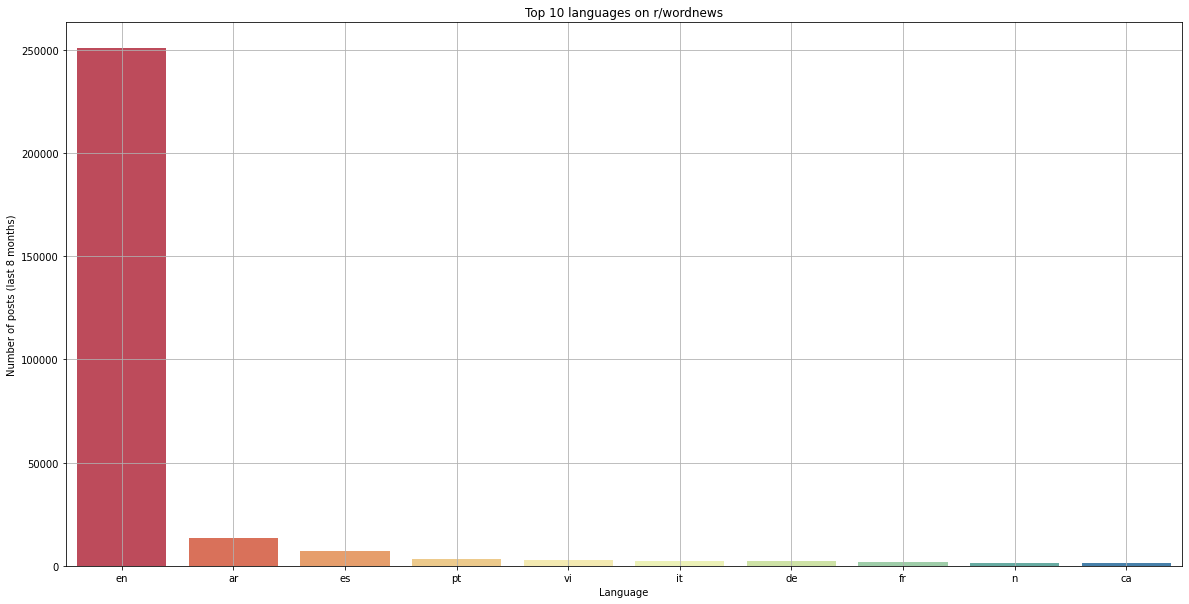

In [26]:
# plotting
ax, fig = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="Language", y="Count", data=langs[:10], palette='Spectral')
ax.set(xlabel="Language", ylabel="Number of posts (last 8 months)", title="Top 10 languages on r/wordnews")
ax.grid()
plt.show()